# Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dataset Loading

1. The task in MNIST digit classification is to correctly classify handwritten digits into one of these 10 categories.
2. Each sample in the dataset is a `grayscale` image of `size 28×28` pixels.
3. Classes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [6]:
#x_train[0]

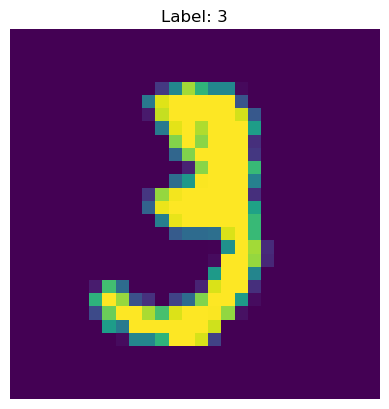

In [8]:
plt.imshow(x_train[10])
plt.title(f"Label: {y_train[10]}")
plt.axis('off')
plt.show()

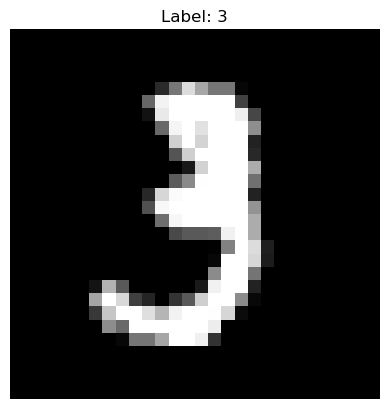

In [10]:
plt.imshow(x_train[10], cmap='gray')
plt.title(f"Label: {y_train[10]}")
plt.axis('off')
plt.show()

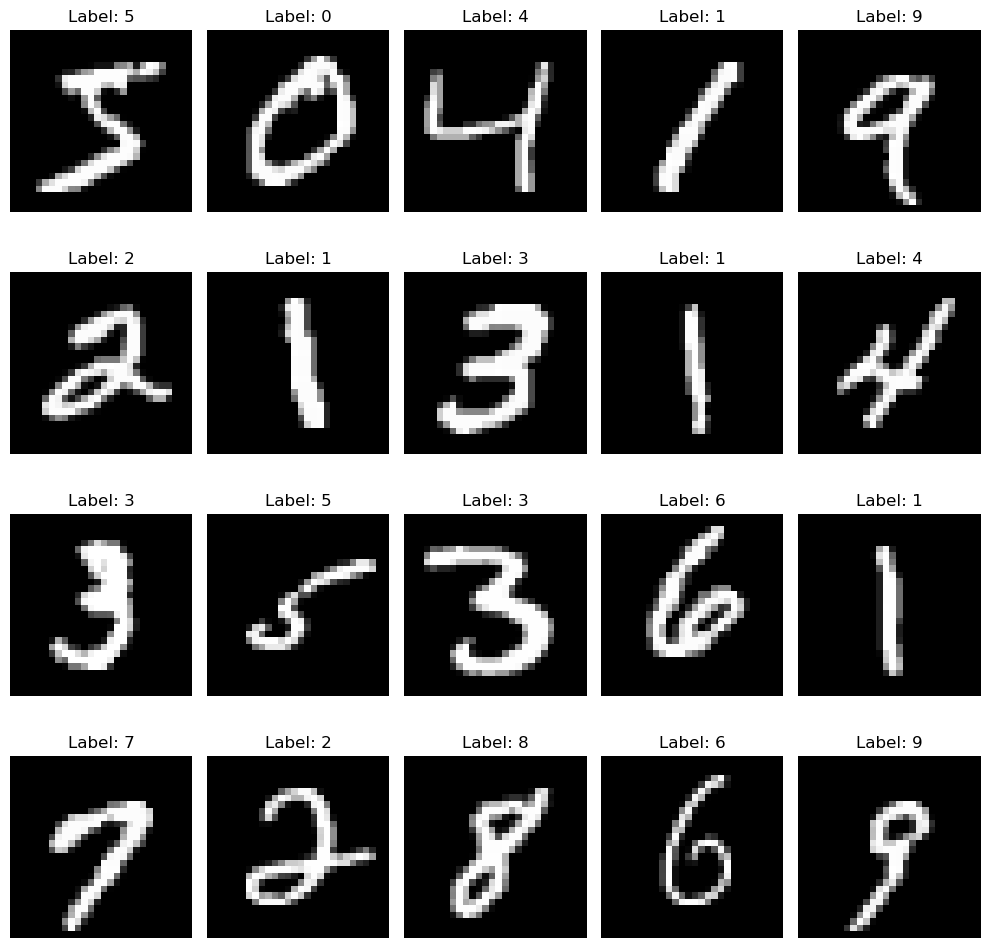

In [14]:
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Normalization

1. Reshaping prepares the data for fully connected layers in a neural network.
2. Normalization ensures faster and more stable training by scaling input values.

In [15]:
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0  

# Define the Neural Network Architecture

In [16]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),  # Input layer
    Dense(64, activation='relu'),                         # Hidden layer
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')                       # Output layer
])

# Compile the Model

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Train the Model

1. `Batch Size:`A batch size of 32 means that 32 samples are used to compute the gradient and update the model weights before the next batch of 32 samples is processed. 
2. `Number of Epochs:` The number of times the entire training dataset is passed through the model.

In [19]:
45000/32

1406.25

In [18]:
model.fit(x_train, 
          y_train, 
          epochs=10, 
          batch_size=32, 
          validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2870 - accuracy: 0.9147 - val_loss: 0.1490 - val_accuracy: 0.9555
Epoch 2/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1196 - accuracy: 0.9638 - val_loss: 0.1528 - val_accuracy: 0.9557
Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0822 - accuracy: 0.9753 - val_loss: 0.1196 - val_accuracy: 0.9653
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0637 - accuracy: 0.9803 - val_loss: 0.1096 - val_accuracy: 0.9699
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0504 - accuracy: 0.9842 - val_loss: 0.1066 - val_accuracy: 0.9715
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0436 - accuracy: 0.9862 - val_loss: 0.0993 - val_accuracy: 0.9725
Epoch 7/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.1036 - val_accuracy:

# Evaluate the model's performance on test data

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n Test Accuracy: {test_accuracy}")
print(f"\n Test Loss: {test_loss}")

313/313 [==============================] - 0s 712us/step - loss: 0.1112 - accuracy: 0.9748

 Test Accuracy: 0.9747999906539917

 Test Loss: 0.11123427748680115


# Predict on the test set

In [21]:
y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 0s 586us/step


array([[4.36917906e-12, 1.30245519e-06, 7.29888164e-11, ...,
        9.99998569e-01, 6.29759320e-13, 2.04077111e-08],
       [4.99386340e-12, 7.18454612e-05, 9.99928117e-01, ...,
        3.17464392e-12, 7.95418505e-12, 4.43473443e-16],
       [1.03579495e-07, 9.99657989e-01, 2.45858018e-06, ...,
        1.11144145e-04, 1.07046741e-04, 1.11412623e-06],
       ...,
       [2.08451069e-17, 4.23175600e-12, 9.58395486e-14, ...,
        3.56668688e-11, 4.37835125e-13, 2.38773978e-09],
       [3.81657020e-14, 5.08256403e-16, 4.14848073e-20, ...,
        1.20980682e-14, 2.06289208e-09, 1.89266835e-14],
       [2.14697843e-10, 1.62797361e-13, 1.42904187e-11, ...,
        1.68472048e-13, 3.40690542e-09, 4.37716513e-13]], dtype=float32)

In [22]:
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Compute the confusion matrix

In [23]:
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 956    0    5    0    1    3    5    0    5    5]
 [   0 1126    0    1    0    0    1    1    6    0]
 [   2    3  992    9    3    0    2   15    5    1]
 [   0    0    3  989    0   10    0    4    3    1]
 [   0    0    4    0  964    0    2    2    1    9]
 [   2    0    0    6    1  871    2    1    5    4]
 [   0    2    0    1    5    8  937    0    5    0]
 [   1    3    6    7    3    0    1  999    1    7]
 [   1    1    0   17    1    6    0    5  929   14]
 [   0    2    0    5    8    5    0    2    2  985]]


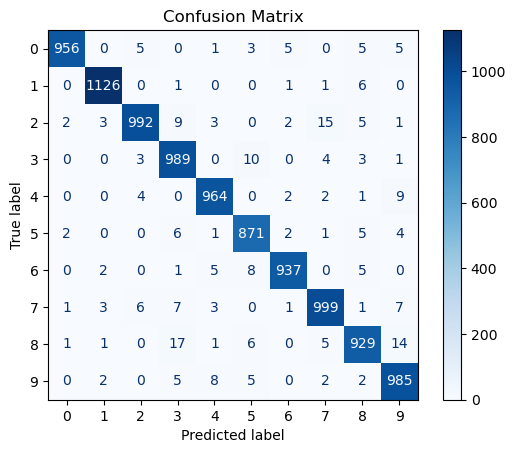

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Save the model

In [25]:
model.save('nn_model.h5')

# Load model

In [26]:
loaded_model = tf.keras.models.load_model('nn_model.h5')
loaded_model

# Prediction

1/1 [==============================] - 0s 16ms/step
True Label: 8
Predicted Label: 8


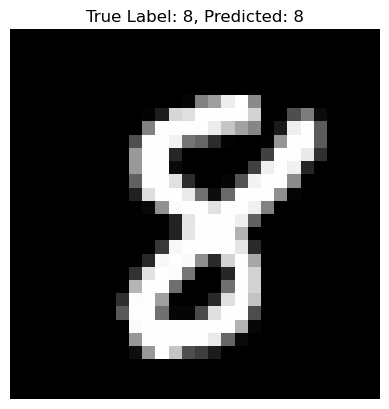

In [36]:
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]
random_label = y_test[random_index]

random_image_reshaped = random_image.reshape(1, 28 * 28) 
predictions = loaded_model.predict(random_image_reshaped) 
predicted_label = np.argmax(predictions)

print(f"True Label: {random_label}")
print(f"Predicted Label: {predicted_label}")

plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {random_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()